In [4]:
import numpy as np

np.random.seed(123)


In [8]:
import preliz as pz
trials = 4 
theta_real = 0.35 # unknown value in a real experiment 
data = pz.Binomial(n=1, p=theta_real).rvs(trials)

In [14]:
import pymc as pm

with pm.Model() as our_first_model: 
    θ = pm.Beta('θ', alpha=1., beta=1.) 
    y = pm.Bernoulli('y', p=θ, observed=data) 
    idata = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>]],
      dtype=object)

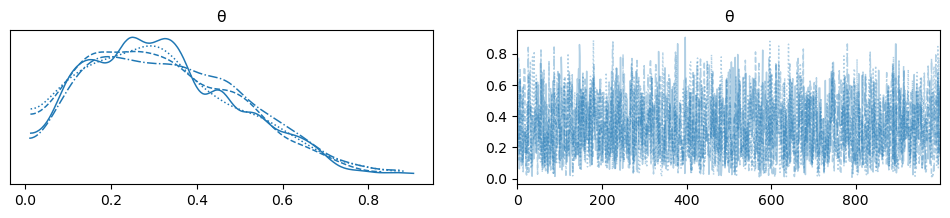

In [15]:
import arviz as az
az.plot_trace(idata)

array([[<Axes: title={'center': 'θ'}>,
        <Axes: title={'center': 'θ'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

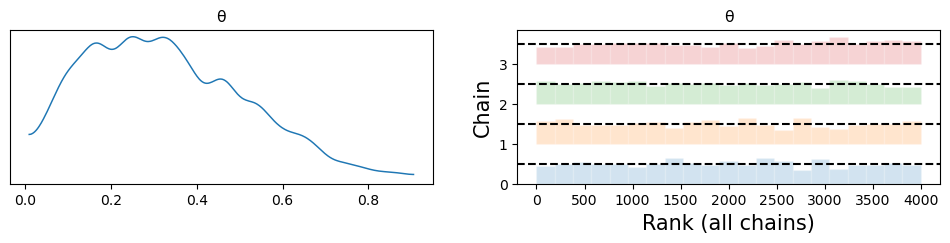

In [16]:
az.plot_trace(idata, kind="rank_bars", combined=True)

In [17]:
az.summary(idata, kind="stats").round(2)

,mean,sd,hdi_3%,hdi_97%
θ,0.33,0.18,0.03,0.65


<Axes: title={'center': 'θ'}>

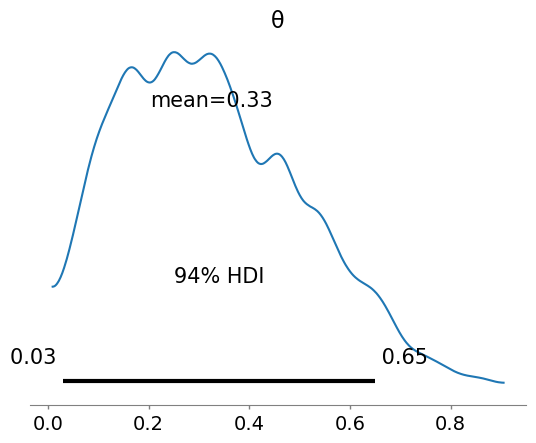

In [18]:
az.plot_posterior(idata)

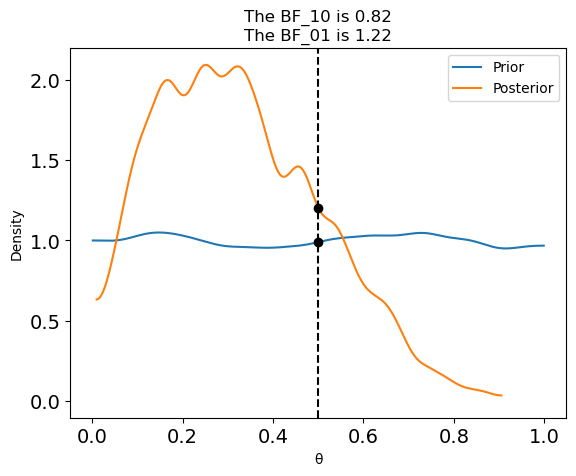

In [33]:
az.plot_bf(idata, var_name="θ", 
           prior=np.random.uniform(0, 1, 10000), ref_val=0.5);